<a href="https://colab.research.google.com/github/SilvaMercedes/no-supervisado/blob/main/Copia_de_ANS_TP_clustering_fifa2022_Colab_02_09_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

## Trabajo Práctico de Aprendizaje No Supervisado DiploDatos
  **Integrantes**

Victor Nicolas Rocco

Maria Mercedes Silva

Santiago Franco

Williams Gremoliche
## Agrupamiento con el FIFA 2022 dataset

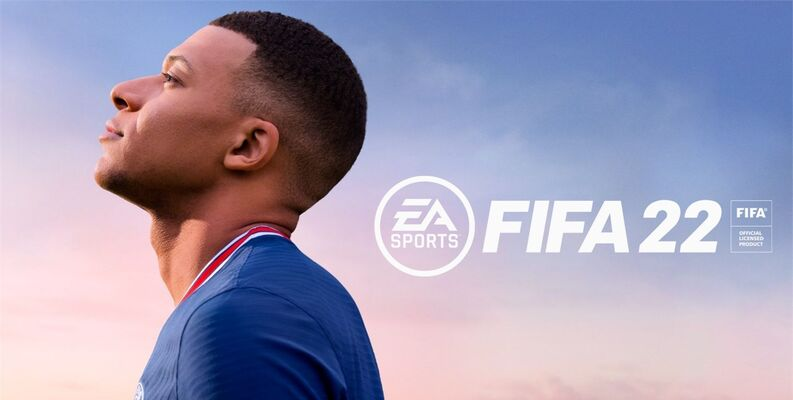
    

**HISTORIAL**
- 2022-08-23 Victor hasta celda #110
- 2022-08-24 Coloque las preguntas faltantes y justifico algunas que faltan despues de la celda #110 hasta la #160
-2022-08-29 respuesta de la pregunta 5 (revisen por favor)


## 0.-Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [192]:
#010 Importacion de librerias a usar

import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [193]:
#020 Importacion de librerias a usar

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
import seaborn as sns

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

## CONSIGNA 1 - Análisis exploratorio de la base

**Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset) (https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset) como 'players_22.csv'.** 

In [194]:
#030

url='https://raw.githubusercontent.com/wgremoliche/AprendizajeNOSupervisado/master/players_22.csv'

In [195]:
#040 Cargamos el dataset CSV con Pandas en un DataFrame y visualizamos los datos
#basicos del mismo

df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [196]:
#050 visualizamos las primeras filas del dataframe
df.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

In [197]:
#060 Visualizamos las ultimas filas
df.tail(4)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,70,445.0,Derry City,Rep. Ireland Airtricity League,1.0,RES,27.0,NaN,2021-02-22,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,193000.0,NaN,NaN,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,...,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,NaN,45+2,45+2,45+2,47,46,46,46,47,47+2,47+2,47+2,49+2,47+2,47+2,47+2,49+2,49+2,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,72,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,31.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,175000.0,NaN,NaN,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,...,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN,45+2,45+2,45+2,46,46,46,46,46,47+2,47+2,47+2,48+2,47+2,47+2,47+2,48+2,47+2,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,66,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,12.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,239000.0,NaN,NaN,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,...,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN,47+2,47+2,47+2,47,47,47,47,47,45+2,45+2,45+2,45+2,39+2,39+2,39+2,45+2,33+2,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19238,264540,https://sofifa.com/player/264540/emanuel-lalch...,E. Lalchhanchhuaha,Emanuel Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,2002-02-06,167,61,113040.0,NorthEast United FC,Indian Super League,1.0,SUB,13.0,NaN,2021-08-31,2025.0,159,India,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-),No,217000.0,NaN,NaN,68.0,38.0,45.0,48.0,36.0,48.0,39,32,46,50,37,48,38,...,57,40,36,55,42,47,46,35,36,33,31,37,8,13,13,9,14,NaN,45+2,45+2,45+2,47,47,47,47,47,47+2,47+2,47+2,48+2,46+2,46+2,46+2,48+2,45+2,44+2,44+2,44+2,45+2,45+2,41+2,41+2,41+2,45+2,16+2,https://cdn.sofifa.net/players/264/540/22_120.png,https://cdn.sofifa.net/teams/113040/60.p

In [198]:
#070 Visualizamos mas detalladamente las columnas 
#para ver que tipo de datos tienen
for tipo, columna in zip(df.dtypes, df.columns):
  print(tipo, columna)

int64 sofifa_id
object player_url
object short_name
object long_name
object player_positions
int64 overall
int64 potential
float64 value_eur
float64 wage_eur
int64 age
object dob
int64 height_cm
int64 weight_kg
float64 club_team_id
object club_name
object league_name
float64 league_level
object club_position
float64 club_jersey_number
object club_loaned_from
object club_joined
float64 club_contract_valid_until
int64 nationality_id
object nationality_name
float64 nation_team_id
object nation_position
float64 nation_jersey_number
object preferred_foot
int64 weak_foot
int64 skill_moves
int64 international_reputation
object work_rate
object body_type
object real_face
float64 release_clause_eur
object player_tags
object player_traits
float64 pace
float64 shooting
float64 passing
float64 dribbling
float64 defending
float64 physic
int64 attacking_crossing
int64 attacking_finishing
int64 attacking_heading_accuracy
int64 attacking_short_passing
int64 attacking_volleys
int64 skill_dribbling
int6

In [199]:
#080 Para las columnas numericas hacemos "describe"
dtypes = df.dtypes.to_dict()
for nombre_de_columna, tipo_de_columna in dtypes.items():
    if (tipo_de_columna == 'int64') or (tipo_de_columna == 'float64'):
      print()
      print("###---###---###---###---###")
      print()
      print(nombre_de_columna, tipo_de_columna)
      print(df[nombre_de_columna].describe().apply("{0:.1f}".format))   


###---###---###---###---###

sofifa_id int64
count     19239.0
mean     231468.1
std       27039.7
min          41.0
25%      214413.5
50%      236543.0
75%      253532.5
max      264640.0
Name: sofifa_id, dtype: object

###---###---###---###---###

overall int64
count    19239.0
mean        65.8
std          6.9
min         47.0
25%         61.0
50%         66.0
75%         70.0
max         93.0
Name: overall, dtype: object

###---###---###---###---###

potential int64
count    19239.0
mean        71.1
std          6.1
min         49.0
25%         67.0
50%         71.0
75%         75.0
max         95.0
Name: potential, dtype: object

###---###---###---###---###

value_eur float64
count        19165.0
mean       2850451.8
std        7613699.9
min           9000.0
25%         475000.0
50%         975000.0
75%        2000000.0
max      194000000.0
Name: value_eur, dtype: object

###---###---###---###---###

wage_eur float64
count     19178.0
mean       9018.0
std       19470.2
min      

# *Columnas* mas importantes:

La variable **'Overall'** se calcula usando otras variables de desempeño del jugador (skills_ratings), utilizando redondeo

La variable 'Overall' es numérica discreta, (pero de "naturaleza" continua) así como las otras de desempeño según habilidad ('Crossing',
       'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100, más allá del tipo de dato en estos casos.
       
Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'. 

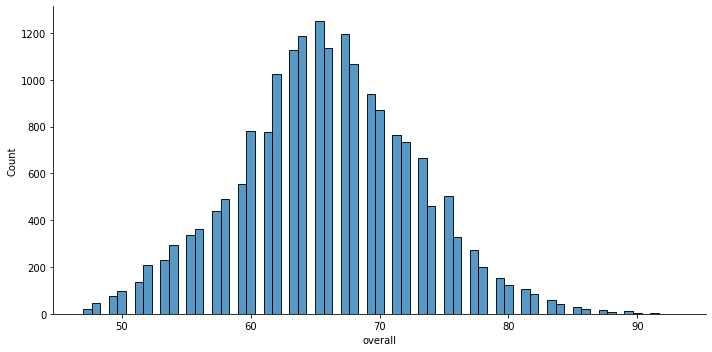

In [200]:
#090 Variable OVERALL (rendimiento global), 
#histograma de cantidad de jugadores con esa valoracion
sns.displot(df['overall'], stat='count', aspect=2)

count    19239.0
mean        65.8
std          6.9
min         47.0
25%         61.0
50%         66.0
75%         70.0
max         93.0
Name: overall, dtype: object


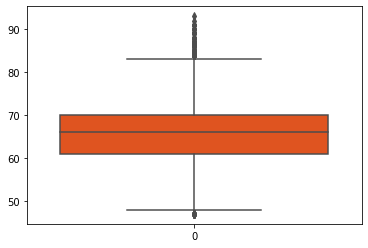

In [201]:
#100 Boxplot de OVERALL (rendimiento global)
#Identificacion rapida de los rangos de valores de lo jugadores
#para luego filtrar los de menor valor segun creiterio seleccionado de 
#esta tabla y tambien ver a partir de que rango se pueden considerar
#"estrellas" segun sean outliers
print(df['overall'].describe().apply("{0:.1f}".format))
sns.boxplot(data=df['overall'], color='orangered')

Mejores jugadores por posición:

In [202]:
#110 Identificamos a los mejores jugadores por posicion
#NOTA: algunos juegan en varias posiciones, por lo que se evaluan en cada una de ellas

#En esta 1ra etapa, seleccionamos las distintas posiciones (y contamos
#cuantos jugadores juegan en esa posicion)

posiciones_unicas = df["player_positions"].str.split(',').explode().str.strip().unique().tolist()
cantidad_de_jugadores_por_posicion = df["player_positions"].str.split(',').explode().str.strip().value_counts()
cantidad_de_jugadores_por_posicion

CM     4204
CB     4021
ST     3398
CDM    3014
LM     2521
RM     2435
CAM    2260
GK     2132
RB     2132
LB     2101
RW     1172
LW     1154
LWB     492
RWB     457
CF      452
Name: player_positions, dtype: int64

In [203]:
#120 Identificamos a los mejores jugadores por posicion
#NOTA: algunos juegan en varias posiciones, por lo que se evaluan en cada una de ellas
#En esta 2da etapa, seleccionamos los mejores jugadores por posicion

mejores_jugadores_por_posicion = {}
for posicion in posiciones_unicas:
  mejores_jugadores_por_posicion[posicion]= {"jugador" : "", "overall" : 0}

for row in df.itertuples():
  _jugador = str(row.short_name)
  _overall = int(row.overall)
  for posicion in row.player_positions.split(','):
    posicion = posicion.strip()
    if _overall > mejores_jugadores_por_posicion[posicion]["overall"]:
      mejores_jugadores_por_posicion[posicion]= {"jugador" : _jugador, "overall" : _overall}

for posicion in posiciones_unicas:
  print("POSICION:", posicion, 
        ", OVERALL:", mejores_jugadores_por_posicion[posicion]["overall"],
        ", JUGADOR:", mejores_jugadores_por_posicion[posicion]["jugador"])


POSICION: RW , OVERALL: 93 , JUGADOR: L. Messi
POSICION: ST , OVERALL: 93 , JUGADOR: L. Messi
POSICION: CF , OVERALL: 93 , JUGADOR: L. Messi
POSICION: LW , OVERALL: 91 , JUGADOR: Cristiano Ronaldo
POSICION: CAM , OVERALL: 91 , JUGADOR: Neymar Jr
POSICION: CM , OVERALL: 91 , JUGADOR: K. De Bruyne
POSICION: GK , OVERALL: 91 , JUGADOR: J. Oblak
POSICION: CDM , OVERALL: 90 , JUGADOR: N. Kanté
POSICION: LM , OVERALL: 89 , JUGADOR: H. Son
POSICION: CB , OVERALL: 89 , JUGADOR: V. van Dijk
POSICION: RB , OVERALL: 89 , JUGADOR: J. Kimmich
POSICION: RM , OVERALL: 87 , JUGADOR: T. Müller
POSICION: LB , OVERALL: 87 , JUGADOR: A. Robertson
POSICION: RWB , OVERALL: 85 , JUGADOR: A. Hakimi
POSICION: LWB , OVERALL: 84 , JUGADOR: F. Kostić


Mejores Promedios de Overall por equipos

In [204]:
#130 Se agrupan los mejores promedios de Overall por equipos 
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

,club_name,overall
368,Juventus,79.961538
470,Paris Saint-Germain,79.454545
358,Inter,78.857143
241,FC Bayern München,78.071429
412,Manchester United,78.000000
509,Real Madrid CF,77.757576
434,Napoli,77.500000
63,Atalanta,77.480000


## 2.-Preparación-de-los-datos-a analizar

**Reducimos el tamaño de la base. Retiramos jugadores con bajo Desempeño global ("Overall"),**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [205]:
#140 Se reduce el tamaño de la base para trabajar con los jugadores con alto desempeño (Overall > 70) 
# y  se consideran 10000 jugadores de los 19238 originales

n=10000 #cantidad de jugadores a considerar
df_n=df.loc[:n] #se reduce la base a los n primeros jugadores
df_n=df_n[(df_n['overall']>70)] # se trabaja con aquellos con Overall>70
skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                  'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [206]:
#150 Se crea el jugador perfecto
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n=df_n.append(MachineGunDict,ignore_index=True)

In [207]:
#160 Se crea el Jugador Promedio 
JugadorPromedioDict={'short_name':'JugadorPromedio','overall':df_n.overall.mean()}

for skills in skills_ratings:
    JugadorPromedioDict[skills]=df_n[skills].mean()
    
df_n=df_n.append(JugadorPromedioDict,ignore_index=True)

In [208]:
#170 Se crea un Dataframe con los jugadores con habilidades altas
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)
df_skills.head(4)

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0


## 3.-Exploratorio-Visual-para-Clustering

Visualizamos los datos (jugadores) según sus habilidades es decir, en un espacio 34 dimensional. Cómo hacemos? empecemos de a dos variables numéricas por vez

**Consigna de trabajo:** visualizar a los jugadores (datos) usando las variables numéricas en skill_ratings de a pares. Emergen grupos/clusters?

In [209]:
#180 visualizamos los skills_rating para luego elegir algunos
skills_ratings

['attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

In [210]:
#190 seleccionamos dos skills_rating y los visualizamos
#data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores
#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5] #5,  skill_dribbling
skill_2=skills_ratings[29]  #29, goalkeeping_diving

Gráfica con matplotlib.pyplot, liviana pero más sencilla

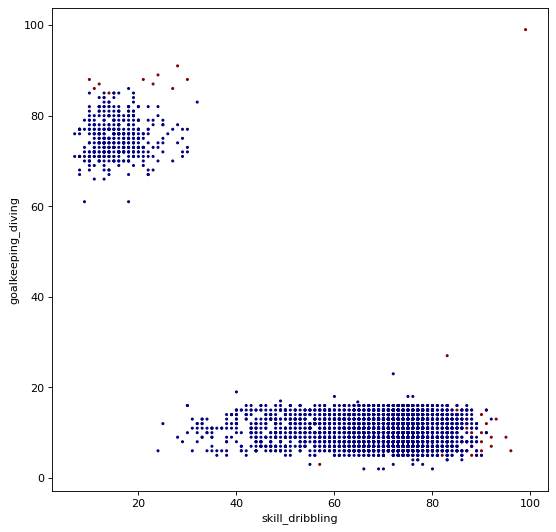

In [211]:
#200 Graficamos los skills_rating seleccionados
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [212]:
#210 diferenciamos a los arqueros
bool_GK=df_n["player_positions"] == 'GK'

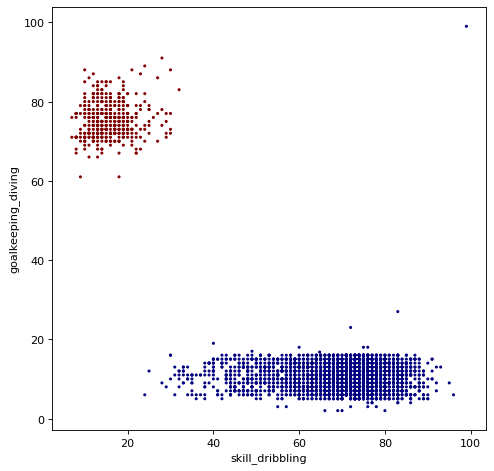

In [213]:
#220 Graficamos los skills_rating seleccionados diferenciando los arqueros
plt.figure(figsize=(7,7), dpi=80)
plt.scatter(df_n[skill_1], y=df_n[skill_2],s=3,c=bool_GK,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

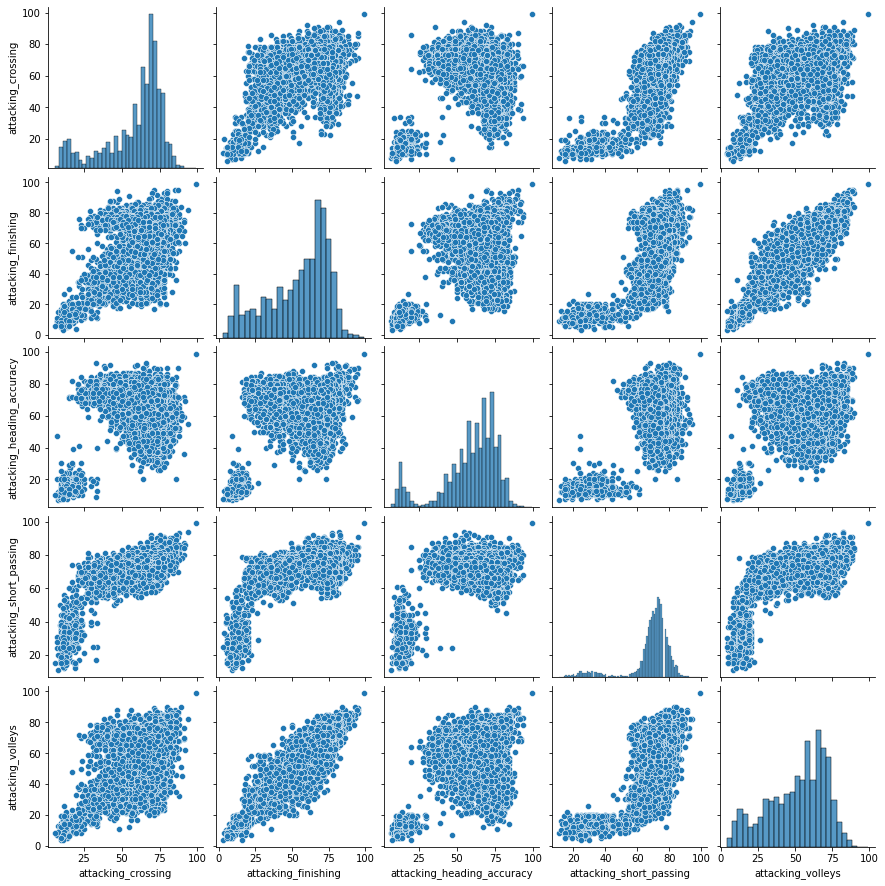

In [214]:
#230 
sns.pairplot(df_skills[skills_ratings[0:5]])

Gráfica con Plotly, más completa e interactiva pero un poco pesada

In [215]:
#240 Elejimos dos variables (goalKipping_diving y  Skill_dribbling ), para esto elegimos dos números entre 0 y  de n_skills-1
###-------de los gráficos anteriores elegir mejor los skill que se van a analizar-------------------------------------------

skill_1=skills_ratings[5]
skill_2=skills_ratings[29]

In [216]:
#250 Graficamos los skills_rating seleccionados 
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(size=5))
crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')
data=[graf1,crack]
layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)
fig = go.Figure(data=data, layout=layout)
# En Colab
fig.show(renderer="colab")

**Consigna de trabajo:** buscar agrupamientos de jugadores de manera intuitiva por cercanía (en espacios bidimensionales, de a dos variables por vez).

Que siginifica cercanía? cómo se mide? en que espacio/s están buscando? 

Si se encuentran, tratar de explicarlos visualmente.

-----------------------------------------------------
En próxima gráfica, similar a la anterior, también se diferencian los mejores jugadores y alguna característica/variable de interés (que pueden cambiar)

Se puede ubicar también un jugador en particular. Con la siguiente linea de comando, por ejemplo, Leo Messi: 

In [217]:
#260 Analizamos en donde se encuentran distintos tipos de jugadores
#Elegimos un jugador para graficar

recherche_joueur=df_n["short_name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 

bool_crack=df_n["overall"] > 85
bool_elecc=df_n["player_positions"]=='GK' 
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

#bool_elecc=df_n["Name"]=='JugadorPromedio'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[2]  #2 attacking_heading_accuracy
skill_2=skills_ratings[4]  #4 attacking_volleys

Gráfica con plotly

In [218]:
#270 Graficamos
palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]
n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average players',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'player_positions'],
                         opacity=0.9,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
# En Colab
fig.show(renderer="colab")

**Identifiquemos algunos jugadores por nombre**

In [219]:
#280 imprimimos
print(df_n.loc[0:43,"short_name"])

0              L. Messi
1        R. Lewandowski
2     Cristiano Ronaldo
3             Neymar Jr
4          K. De Bruyne
5              J. Oblak
6             K. Mbappé
7              M. Neuer
8         M. ter Stegen
9               H. Kane
10             N. Kanté
11           K. Benzema
12          T. Courtois
13               H. Son
14             Casemiro
15          V. van Dijk
16              S. Mané
17             M. Salah
18              Ederson
19           J. Kimmich
20              Alisson
21        G. Donnarumma
22         Sergio Ramos
23            L. Suárez
24             T. Kroos
25            R. Lukaku
26             K. Navas
27          R. Sterling
28      Bruno Fernandes
29           E. Haaland
30            S. Agüero
31            H. Lloris
32            L. Modrić
33          Á. Di María
34          W. Szczęsny
35            T. Müller
36          C. Immobile
37             P. Pogba
38          M. Verratti
39           Marquinhos
40          L. Goretzka
41            P.

# 3.-Clustering-con-Kmeans

ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 


In [220]:
#290 Clustering-con-Kmeans
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn.metrics import silhouette_score
##---------------------------Explicar porqué elegimos el valor del hiperparámetro------------------------------
## ---------------En este punto la elección surge del analisis visual de los gráficos anteriores------------
# Número de clusters buscado
n_clust = 5
km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [221]:
#300 Clustering-con-MeanShift -----------------Willy------------------
clusterer = MeanShift()
preds = clusterer.fit_predict (df_skills)
score = silhouette_score (df_skills, preds)
print( "para n_clusters = {}, silhouette score es {}".format(clusterer.labels_, score))

para n_clusters = [0 0 0 ... 0 2 0], silhouette score es 0.6271795977713034


In [222]:
#310 -----------Willy-------------------------
model = MeanShift()
df_meanshift = df_skills.copy()
yhat = model.fit_predict(df_meanshift)

df_meanshift['label'] = yhat
df_meanshift.head()
print (df_meanshift.groupby('label').size())
# Encontró 3 clusters

label
0    4150
1     444
2       1
dtype: int64


In [223]:
#320 Agrego la columnas con las etiquetas de los clusters encontrados
df_clusters=df_n.copy()
df_clusters['kmeans_5'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,kmeans_5
0,158023.0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93.0,93.0,78000000.0,320000.0,34.0,1987-06-24,170.0,72.0,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52.0,Argentina,1369.0,RW,10.0,Left,4.0,4.0,5.0,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,...,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,2
1,188545.0,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92.0,92.0,119500000.0,270000.0,32.0,1988-08-21,185.0,81.0,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37.0,Poland,1353.0,RS,9.0,Right,4.0,4.0,5.0,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,...,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,4
2,20801.0,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91.0,91.0,45000000.0,270000.0,36.0,1985-02-05,187.0,83.0,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38.0,Portugal,1354.0,ST,7.0,Right,4.0,5.0,5.0,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,...,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,2
3,190871.0,https://sofifa.com/player/190871/neymar-da-sil...,Neymar 

### **4- Evaluación y Análisis de los clusters encontrados.**

In [224]:
#330 vemos que contiene cada cluster segun las posiciones
#----------falta ponerle armar una tabla con las principales posiciones por cluster-------------Victor------

pos= 1
posiciones= df_clusters[df_clusters['kmeans_5'] == pos]
posiciones = posiciones[['kmeans_5','player_positions']]

df2 = posiciones.groupby(['player_positions']).count()
df2.sort_values(by=['kmeans_5'], inplace=True, ascending=False)
df2.head(10)

# Pos = 0 son mayormente defensores
# Pos = 1 son mediocampistas
# Pos = 2 son mayormente defensores
# Pos = 3 son mayormente atacantes


,kmeans_5
player_positions,
GK,444


## Posiciones de los jugadores en el campo de juego
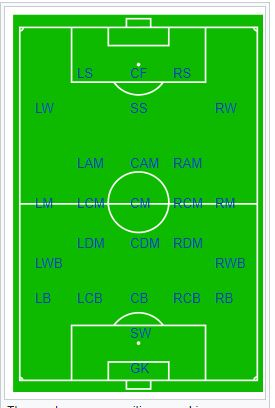

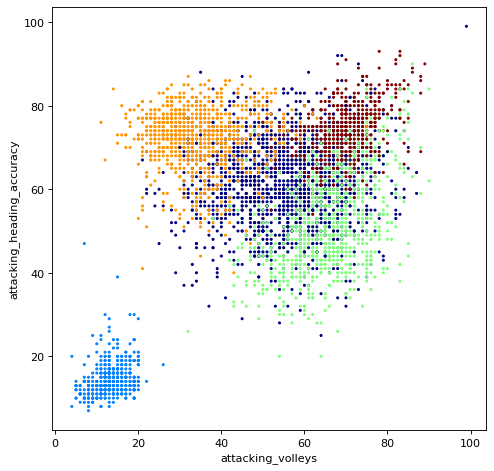

In [225]:
#331 Podemos obsevar a que posición corresponde mayormente cada cluster
##----------------------agregar la correspondencia del color al numemro de cluster------------------------------------------
color ='kmeans_5'
skill_3 = 'attacking_volleys'
skill_4 = 'attacking_heading_accuracy'
plt.figure(figsize=(7,7), dpi=80)
plt.scatter(df_clusters[skill_3], y=df_clusters[skill_4],s=3,cmap='jet', c=df_clusters[color])
plt.xlabel(skill_3)
plt.ylabel(skill_4)
plt.show()

In [226]:
#340 Separamos cuales son buenos jugadores del resto
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligimos dos skill entre 0 y  de n_skills-1
skill_1=skills_ratings[2]
skill_2=skills_ratings[4]

In [227]:
#350 Graficamos
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [228]:
#360 En Colab:
fig.show(renderer="colab")

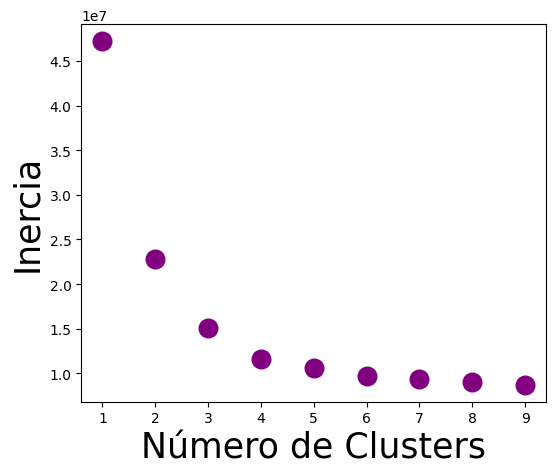

In [229]:
#370
inercias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(df_skills.values)    
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(1, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()

In [230]:
#380 Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [231]:
#390
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
#En Colab:
fig.show(renderer="colab")

In [232]:
#400 #verrificar los NAN y ver los jugadores con varias pocisiones, buscar la posición que tenga primero
##---------------------------Victor-------------------------------------
#forwards=['rf', 'st', 'lw', 'lf', 'rs', 'ls', 'rm', 'lm','rw']
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
#midfielders=['rcm','lcm','ldm','cam','cdm','lam','rdm','cm','ram','cf']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
#defenders=['rcb','cb','lcb','lb','rb','rwb','lwb']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
#goalkeepers=['gk']
goalkeepers=['GK']
def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [233]:
df_n["Position2"]=df_n["player_positions"].apply(lambda x: pos2(x))

df_n["Position2"].value_counts()

nan           2631
Defender       842
Forward        492
GK             444
Midfielder     186
Name: Position2, dtype: int64

In [234]:

df_n["player_positions"].isna().count()

4595

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

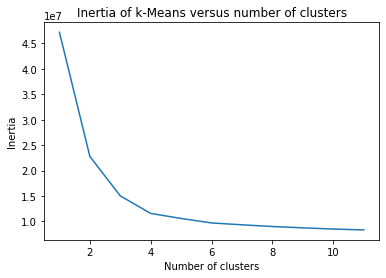

In [235]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(1,12)]

plt.plot(np.arange(1, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")


# 3.- Clustering con DBSCAN ---Willy------

In [236]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [237]:
#escalamos
X = StandardScaler().fit_transform(df_skills)

In [238]:
# Compute DBSCAN

#EPS = 0.3 
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)

[-1 -1 -1 ... -1 -1 -1]


In [239]:
df_X = pd.DataFrame(X)
columnas = df_skills.columns
df_X.columns = columnas
df_X['cluster'] = labels
df_X.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,cluster
0,1.385250,1.958020,0.601589,1.664070,1.885568,1.662393,1.812153,2.246364,1.987732,1.731222,1.572324,0.819330,1.584508,3.938441,1.964819,1.568277,-0.082579,0.139260,-0.088103,1.843063,-1.182723,-0.669557,1.627409,2.388056,1.210221,2.875565,-1.601589,-0.860986,-1.206638,-0.554860,-0.300398,-0.077575,-0.143267,-0.449309,-1
1,0.652095,1.958020,1.685904,1.225938,1.937086,1.077000,1.098757,1.779402,0.514276,1.238784,0.613588,0.749660,0.611507,3.760339,1.071628,1.908996,1.317306,0.402834,1.387483,1.495958,0.987411,-0.257533,1.723897,1.325089,2.107332,2.017716,-0.899974,-0.556144,-1.423721,-0.092064,-0.568313,-0.243744,-0.455565,-0.348782,-1
2,1.489987,1.958020,1.685904,0.860829,1.782532,1.236653,1.200670,1.727518,1.005428,1.238784,1.161437,1.376692,1.237007,3.938441,0.521973,2.249714,2.140768,0.468727,0.606291,1.793477,-0.068330,-1.173143,1.723897,0.945458,1.987718,2.768334,-1.414492,-0.991633,-1.206638,-0.503438,-0.300398,-0.077575,-0.143267,-0.298518,-1
3,1.385250,1.379445,0.222079,1.298960,1.782532,1.609175,1.557369,1.883171,1.286086,1.669667,1.709287,1.446362,1.932008,3.047931,1.209042,1.057199,-0.411964,0.732301,-1.476890,1.198440,-0.068330,-0.806899,1.289701,2.008425,2.286755,2.553872,-0.899974,-0.991633,-0.989556,-0.400595,-0.407564,-0.077575,-0.091217,-0.298518,-1
4,1.856565,1.331231,-0.211647,1.883136,1.576460,1.236653,1.404498,1.675633,2.128061,1.423448,0.545107,0.540649,0.750507,3.404135,0.796801,1.994175,-0.494310,1.259449,0.345893,1.694304,0.694150,0.520736,1.386189,2.312130,1.688680,2.124947,0.643580,0.445480,0.052442,-0.092064,-0.193232,-0.631472,-0.351465,-0.197991,-1


In [240]:
db_clusters = go.Scatter(x=df_X[skill_1], y=df_X[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_X.loc[bool_crack,skill_1], y=df_X.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[db_clusters,crack]

layout = go.Layout(title="Clustering DBSCAN ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
#En Colab:
fig.show(renderer="colab")

In [241]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(X, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels,
#                                           average_method='arithmetic'))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 0
Estimated number of noise points: 4595


# 3.- Modelo de mezcla gaussiana (GMM)

In [242]:
from sklearn.mixture import GaussianMixture
df_GMM = df_skills.copy()
n_clusters = 2
gmm_model = GaussianMixture(n_components= n_clusters)
gmm_model.fit(df_GMM)

GaussianMixture(n_components=2)

In [243]:
gmm_clusters = go.Scatter(x=df_GMM[skill_1], y=df_GMM[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_GMM.loc[bool_crack,skill_1], y=df_GMM.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[gmm_clusters, crack]

layout = go.Layout(title="Clustering GMM ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
#En Colab:
fig.show(renderer="colab")

4- Evaluación y Análisis de los clusters encontrados.



Ajustando la distancia hasta 4, se detectan los dos clústeres observados a simple vista que separan a los arqueros del resto de los jugadores. Mediante los otros metodos se pueden distinguir por posición la distribución de los otros 3 clústeres.


5- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?

No fue necesario realizar una normalizacion o escalado, ya que las variables utilizadas estaban en escala 0 - 100 en el dataset, es decir en el mismo orden de magnitud. Al ser valores entre 0 y 1 se corresponden a la tecnica de normalizacion y escalado min-max scaling por lo tanto no se justifica aplicar niguna otra tecnica de normalización o escalado.

6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

In [246]:
# Embeddings y Agrupamiento 
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train = df_X.select_dtypes(['number'])  #dataset de todos los jugadores FIFA2022
#solo mejores

train.drop(['attacking_heading_accuracy', 'skill_dribbling', 'goalkeeping_diving'], inplace=True, axis=1)
train = StandardScaler().fit_transform(train)
train = pd.DataFrame(train).dropna()

pca = PCA(n_components=3)
pca_res = pca.fit_transform(train)
train.head(3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.385250,1.95802,1.664070,1.885568,1.812153,2.246364,1.987732,1.731222,1.572324,0.819330,1.584508,3.938441,1.964819,1.568277,-0.082579,0.139260,-0.088103,1.843063,-1.182723,-0.669557,1.627409,2.388056,1.210221,2.875565,-1.601589,-0.860986,-1.206638,-0.300398,-0.077575,-0.143267,-0.449309,0.0
1,0.652095,1.95802,1.225938,1.937086,1.098757,1.779402,0.514276,1.238784,0.613588,0.749660,0.611507,3.760339,1.071628,1.908996,1.317306,0.402834,1.387483,1.495958,0.987411,-0.257533,1.723897,1.325089,2.107332,2.017716,-0.899974,-0.556144,-1.423721,-0.568313,-0.243744,-0.455565,-0.348782,0.0
2,1.489987,1.95802,0.860829,1.782532,1.200670,1.727518,1.005428,1.238784,1.161437,1.376692,1.237007,3.938441,0.521973,2.249714,2.140768,0.468727,0.606291,1.793477,-0.068330,-1.173143,1.723897,0.945458,1.987718,2.768334,-1.414492,-0.991633,-1.206638,-0.300398,-0.077575,-0.143267,-0.298518,0.0


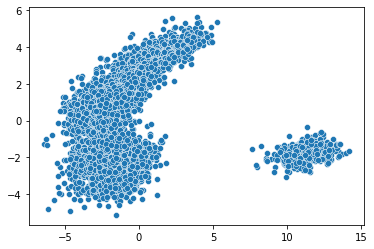

In [247]:
df_pca_comp= pd.DataFrame(data= pca.components_, columns= train.columns.values, index=['Component 1', 'Component 2', 'Component 3'])
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], palette = sns.hls_palette(10), legend = 'full');

In [248]:
scores_pca= pca.transform(train)

In [249]:
wcss_pca=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss_pca.append(kmeans_pca.inertia_)


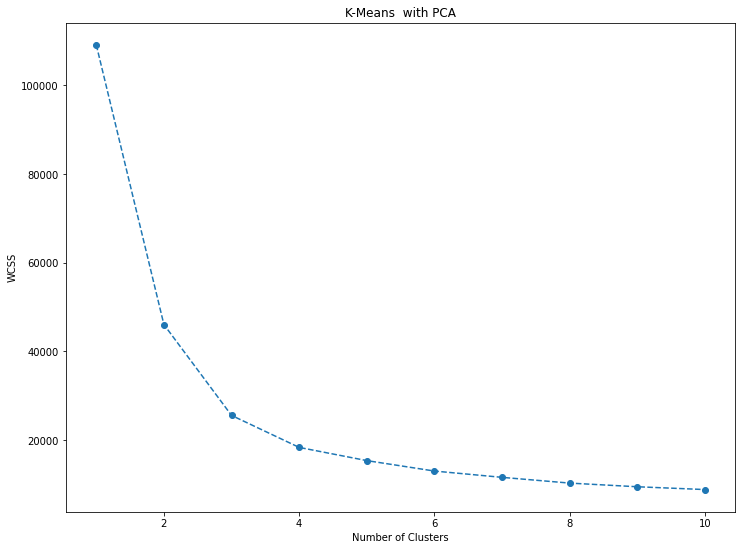

In [250]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss_pca, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means  with PCA")
plt.show()

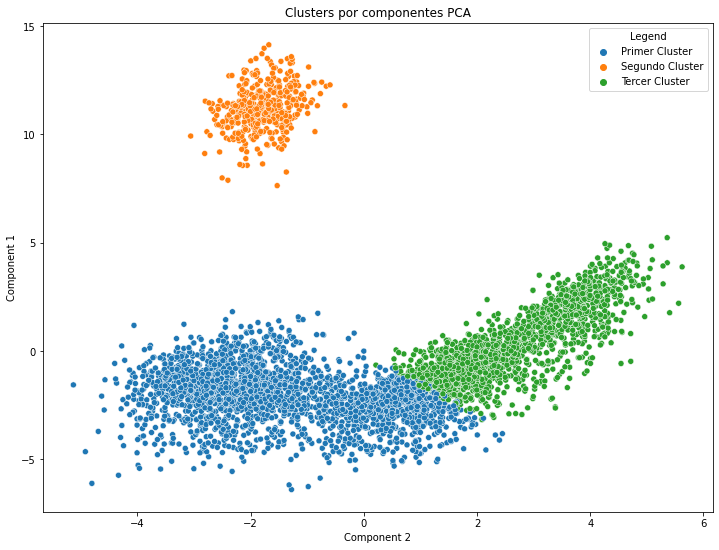

In [251]:
#K-Means clustering with PCA results
kmeans_pca=KMeans(n_clusters=3 , init='k-means++', random_state=85)
kmeans_pca.fit(scores_pca)

df_segm_pca_kmeans= pd.concat([df_n.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3: ]= ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment k-means PCA']= kmeans_pca.labels_
df_segm_pca_kmeans_freq= df_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()
"""
df_segm_pca_kmeans_freq['N-obs']=df_segm_pca_kmeans[['Sex','Segment k-means PCA']].groupby(['Segment k-means PCA']).count()
df_segm_pca_kmeans_freq['Prop-obs']=df_segm_pca_kmeans_freq['N-obs']/df_segm_pca_kmeans_freq['N-obs'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'Standard',1:'Career Focussed',2: 'Fewer Opportunities',3:'Well off'})
df_segm_pca_kmeans_freq
"""
df_segm_pca_kmeans['Legend']= df_segm_pca_kmeans['Segment k-means PCA'].map({0:'Primer Cluster',1:'Segundo Cluster',2: 'Tercer Cluster',3:'Cuarto Cluster'})
plt.figure(figsize=(12,9))
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'])
plt.title('Clusters por componentes PCA')
plt.show()

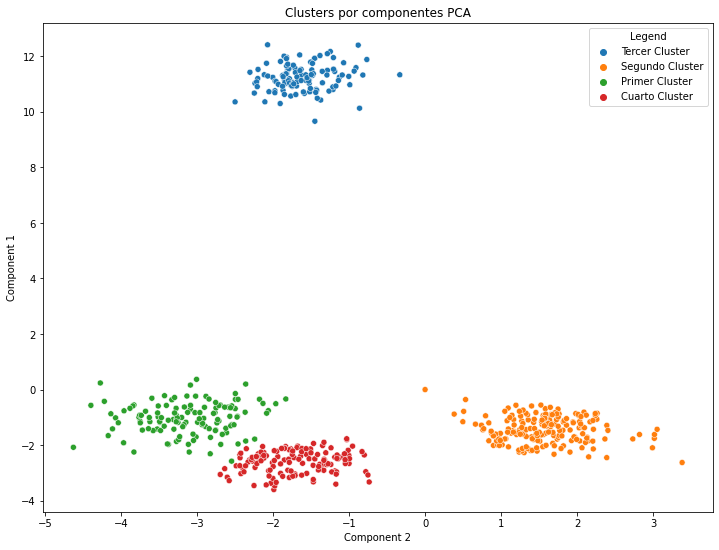

In [252]:
#K-Means clustering con los resultados del PCA 
kmeans_pca=KMeans(n_clusters= 40, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

df_segm_pca_kmeans= pd.concat([df_n.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3: ]= ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment k-means PCA']= kmeans_pca.labels_
df_segm_pca_kmeans_freq= df_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()
"""
df_segm_pca_kmeans_freq['N-obs']=df_segm_pca_kmeans[['Sex','Segment k-means PCA']].groupby(['Segment k-means PCA']).count()
df_segm_pca_kmeans_freq['Prop-obs']=df_segm_pca_kmeans_freq['N-obs']/df_segm_pca_kmeans_freq['N-obs'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'Standard',1:'Career Focussed',2: 'Fewer Opportunities',3:'Well off'})
df_segm_pca_kmeans_freq
"""
df_segm_pca_kmeans['Legend']= df_segm_pca_kmeans['Segment k-means PCA'].map({0:'Primer Cluster',1:'Segundo Cluster',2: 'Tercer Cluster',3:'Cuarto Cluster'})
plt.figure(figsize=(12,9))
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'])
plt.title('Clusters por componentes PCA')
plt.show()

In [253]:
df_best_without_gk = df_n.copy()
df_best_without_gk.drop(df_best_without_gk.loc[df_best_without_gk['player_positions']=='GK'].index, axis=0, inplace=True)
df_best_without_gk

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,Position2
0,158023.0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93.000000,93.0,78000000.0,320000.0,34.0,1987-06-24,170.0,72.0,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52.0,Argentina,1369.0,RW,10.0,Left,4.0,4.0,5.0,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85.000000,95.000000,70.000000,91.000000,88.000000,96.000000,93.000000,...,69.00000,94.000000,44.000000,40.000000,93.000000,95.000000,75.000000,96.0000,20.000000,35.00000,24.00000,6.000000,11.000000,15.000000,14.000000,8.000000,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,nan
1,188545.0,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92.000000,92.0,119500000.0,270000.0,32.0,1988-08-21,185.0,81.0,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37.0,Poland,1353.0,RS,9.0,Right,4.0,4.0,5.0,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71.000000,95.000000,90.000000,85.000000,89.000000,85.000000,79.000000,...,86.00000,87.000000,81.000000,49.000000,95.000000,81.000000,90.000000,88.0000,35.000000,42.00000,19.00000,15.000000,6.000000,12.000000,8.000000,10.000000,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,Forward
2,20801.0,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91.000000,91.0,45000000.0,270000.0,36.0,1985-02-05,187.0,83.0,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38.0,Portugal,1354.0,ST,7.0,Right,4.0,5.0,5.0,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87.000000,95.000000,90.000000,80.000000,86.000000,88.000000,81.000000,...,77.00000,93.000000,63.000000,29.000000,95.000000,76.000000,88.000000,95.0000,24.000000,32.00000,24.00000,7.000000,11.000000,15.000000,14.000000,11.000000,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86

In [254]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

df_best_without_gk["Position2"]=df_best_without_gk["player_positions"].str.split(',').str[0].apply(lambda x: pos2(x))

dict_replace = {'Defender' : 1, 'Forward' : 3, 'GK' : 0, 'Midfielder' : 2}
df_best_without_gk['Position3'] = df_best_without_gk['Position2']
df_best_without_gk.replace({"Position3": dict_replace}, inplace=True)

df_best_without_gk["Position3"].value_counts()

1      1485
3      1332
2      1332
nan       2
Name: Position3, dtype: int64

In [255]:
# APLICAMOS T-SNE
df_best_without_gk_n = df_best_without_gk[skills_ratings]
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_best_without_gk_n)
df_best_without_gk_n['pca-one'] = pca_result[:,0]
df_best_without_gk_n['pca-two'] = pca_result[:,1] 
df_best_without_gk_n['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.47536179 0.17910446 0.08876004]


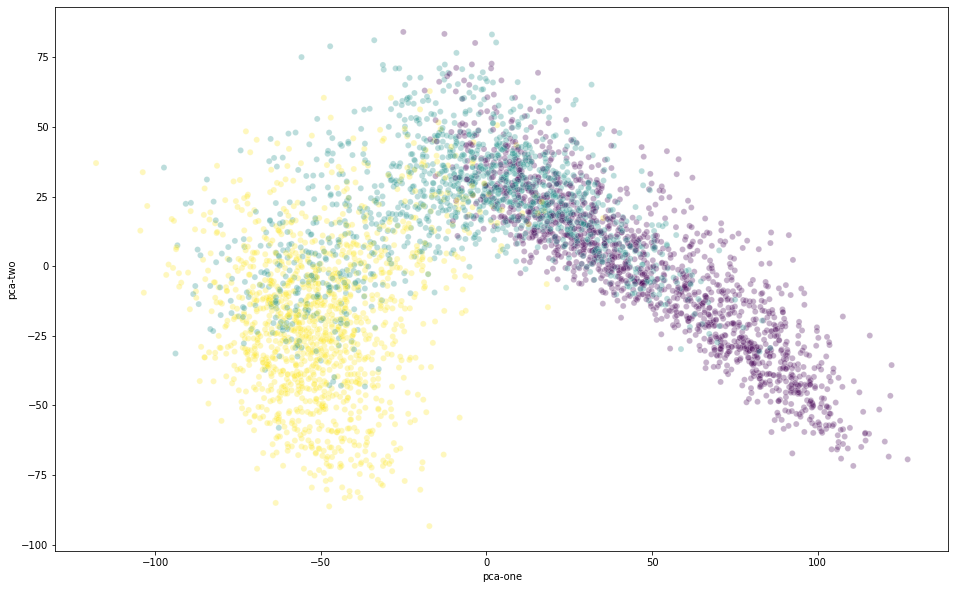

In [256]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    c = df_best_without_gk['Position3'],
    palette=sns.color_palette("hls", 10),
    data=df_best_without_gk_n,
    legend="full",
    alpha=0.3
)

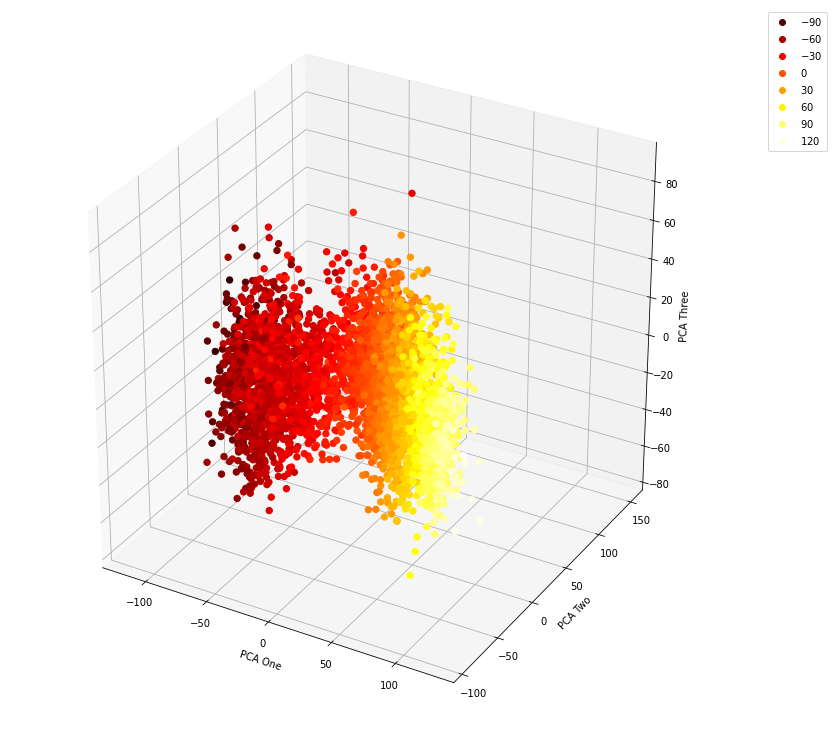

In [257]:

x = df_best_without_gk_n['pca-one']
y = df_best_without_gk_n['pca-two']
z = df_best_without_gk_n['pca-three']

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot

sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap='hot', alpha=1)
ax.set_xlabel('PCA One')
ax.set_ylabel('PCA Two')
ax.set_zlabel('PCA Three')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.show()